In [17]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [18]:
# 2. Load dataset (you can use any dataset related to customer information)
df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())
print(df.info())  # Checking data types and missing values

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [19]:
# 3. Data Preprocessing
# Handling missing values: Fill or drop missing data if present.
# Feature selection: Choose relevant features for customer segmentation.
# Standardize the data: Scaling the features to have similar ranges.
# Handle missing values (if any)
df = df.dropna()

# Selecting relevant features for segmentation
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

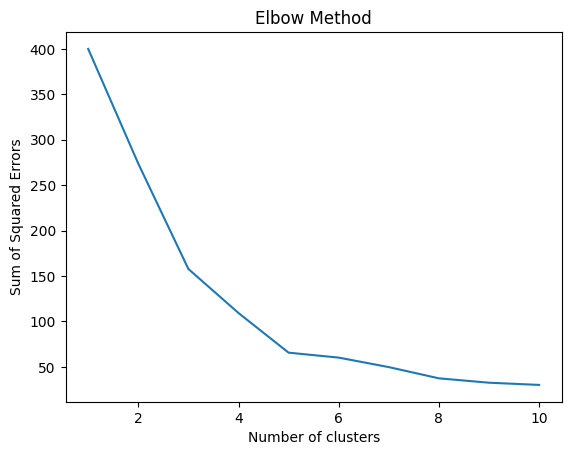

In [20]:
# 4. Elbow Method
# To determine Optimal Number of Clusters The Elbow Method helps to choose the optimal number of clusters by plotting the sum of squared distances for different cluster numbers.
# Elbow method to find optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [21]:
# 5. Apply K-Means Clustering
# Based on the elbow method, we select the optimal number of clusters (let’s assume it's 4).
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Check the cluster assignment
print(df['Cluster'].value_counts())

Cluster
0    101
1     39
3     38
2     22
Name: count, dtype: int64


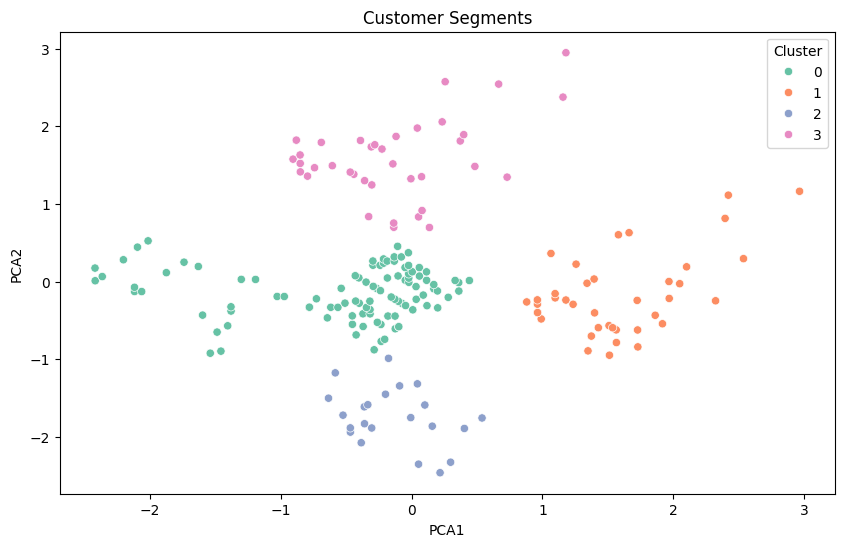

In [22]:
# 6. PCA for Dimensionality Reduction (Optional)
# To visualize the clusters, we can use Principal Component Analysis (PCA) to reduce the features to two dimensions.
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Visualize the clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('Customer Segments')
plt.show()

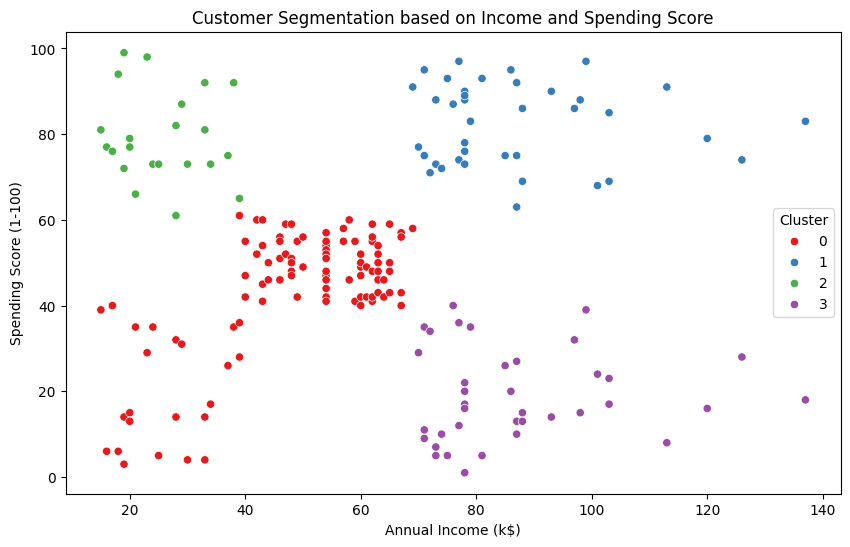

In [23]:
# 7. Visualize the Clusters
# Let's visualize the clusters in terms of their annual income and spending score.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segmentation based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
# 8. Interpret the Results Based on the cluster assignments, the business can now interpret the customer segments. For example:
# Cluster 0 (Red): Moderate-Income, Low-Spending Customers (likely budget-conscious).
# Cluster 1 (Green): Low-Income, High-Spending Customers (price-sensitive but engaged).
# Cluster 2 (Blue): High-Income, High-Spending Customers (likely VIPs).
# Cluster 3 (Purple): High-Income, Low-Spending Customers (potential upsell opportunity).